In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
df = pd.read_csv('iris.csv')
print(df)

     sepal length  sepal width  petal length  petal width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [3]:
print(df.keys())

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')


In [4]:
keys = ['sepal length', 'sepal width', 'petal length', 'petal width']
for key in keys:
    df[key] = (df[key] - df[key].min()) / (df[key].max() - df[key].min())
print(df.values)

[[0.22222222222222213 0.6249999999999999 0.06779661016949151
  0.04166666666666667 'Iris-setosa']
 [0.1666666666666668 0.41666666666666663 0.06779661016949151
  0.04166666666666667 'Iris-setosa']
 [0.11111111111111119 0.5 0.05084745762711865 0.04166666666666667
  'Iris-setosa']
 [0.08333333333333327 0.4583333333333333 0.0847457627118644
  0.04166666666666667 'Iris-setosa']
 [0.19444444444444448 0.6666666666666666 0.06779661016949151
  0.04166666666666667 'Iris-setosa']
 [0.30555555555555564 0.7916666666666665 0.11864406779661016
  0.12500000000000003 'Iris-setosa']
 [0.08333333333333327 0.5833333333333333 0.06779661016949151
  0.08333333333333333 'Iris-setosa']
 [0.19444444444444448 0.5833333333333333 0.0847457627118644
  0.04166666666666667 'Iris-setosa']
 [0.027777777777777922 0.3749999999999999 0.06779661016949151
  0.04166666666666667 'Iris-setosa']
 [0.1666666666666668 0.4583333333333333 0.0847457627118644 0.0
  'Iris-setosa']
 [0.30555555555555564 0.7083333333333333 0.08474576271

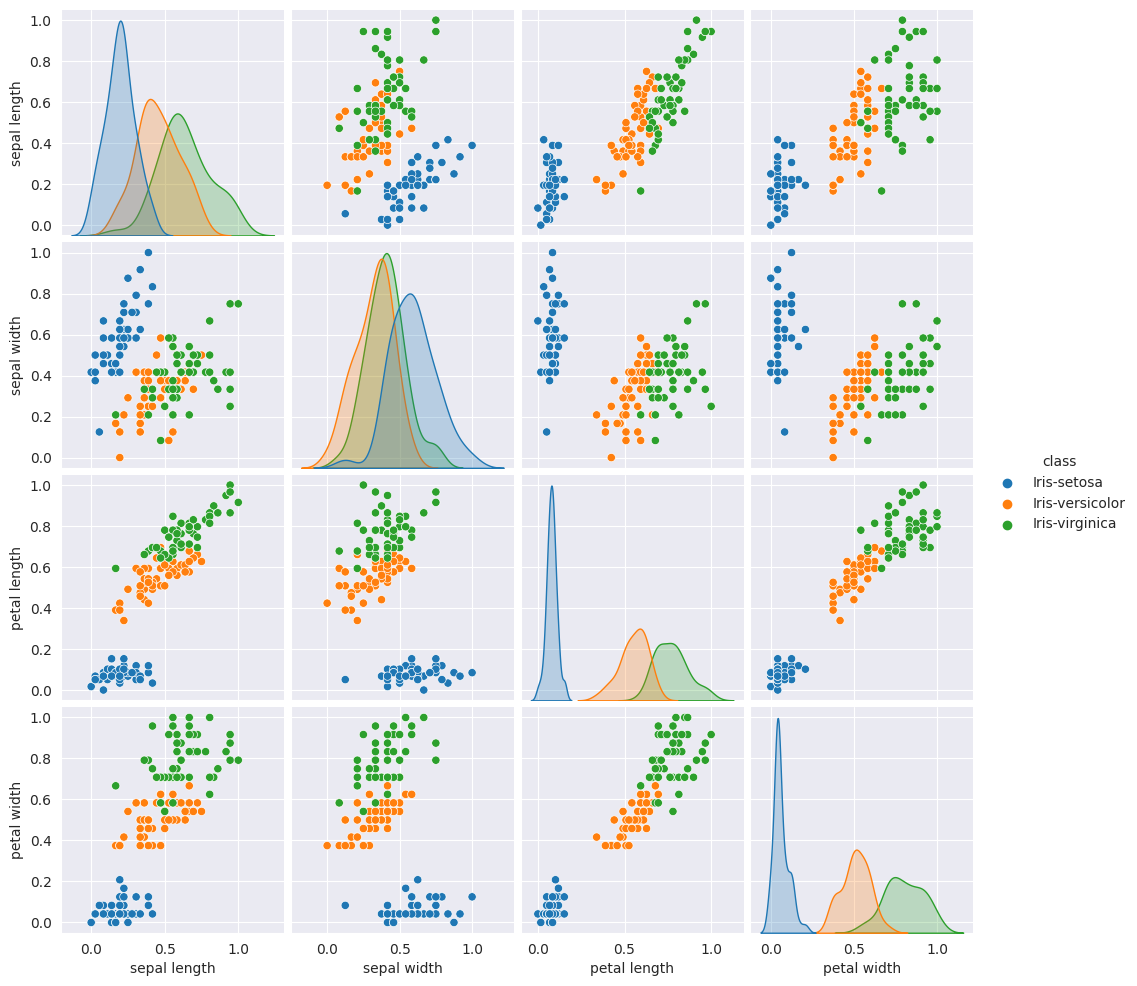

In [5]:
sns.pairplot(df, hue='class')

In [6]:
print(df.values)

[[0.22222222222222213 0.6249999999999999 0.06779661016949151
  0.04166666666666667 'Iris-setosa']
 [0.1666666666666668 0.41666666666666663 0.06779661016949151
  0.04166666666666667 'Iris-setosa']
 [0.11111111111111119 0.5 0.05084745762711865 0.04166666666666667
  'Iris-setosa']
 [0.08333333333333327 0.4583333333333333 0.0847457627118644
  0.04166666666666667 'Iris-setosa']
 [0.19444444444444448 0.6666666666666666 0.06779661016949151
  0.04166666666666667 'Iris-setosa']
 [0.30555555555555564 0.7916666666666665 0.11864406779661016
  0.12500000000000003 'Iris-setosa']
 [0.08333333333333327 0.5833333333333333 0.06779661016949151
  0.08333333333333333 'Iris-setosa']
 [0.19444444444444448 0.5833333333333333 0.0847457627118644
  0.04166666666666667 'Iris-setosa']
 [0.027777777777777922 0.3749999999999999 0.06779661016949151
  0.04166666666666667 'Iris-setosa']
 [0.1666666666666668 0.4583333333333333 0.0847457627118644 0.0
  'Iris-setosa']
 [0.30555555555555564 0.7083333333333333 0.08474576271

In [12]:
train, test = train_test_split(df, test_size=0.2)
print(len(df))
print(len(train))
print(len(test))

150
120
30


In [13]:
def distance(v1, v2):

    res = 0
    for i in range(len(v1)):
        res += (v1[i] - v2[i]) ** 2
    return res

In [14]:
class Model:
    def __init__(self):
        self.points = []
        self.classes = []

    def fit(self, data):
        for row in data.values:
            if row[-1] not in self.classes:
                self.classes.append(row[-1])
            class_i = self.classes.index(row[-1])
            self.points.append((row, class_i))

    def predict(self, params, k):
        distances = []
        for p in self.points:
            distances.append((distance(params, p[0]), p[1]))
        distances.sort(key=lambda row: row[0])
        classes_counts = {}
        for i in range(k):
            classes_counts[distances[i][1]] = classes_counts.get(distances[i][1], 0) + 1
        max_class = -1
        max_count = -1
        for key in classes_counts.keys():
            value = classes_counts[key]
            if value > max_count:
                max_class = key
                max_count = value
        return self.classes[max_class]

In [15]:
model = Model()
model.fit(train)
optimal = {}
for k in range(20):
    total = 0
    correct = 0
    for row in train.values:
        predict = model.predict(row[:4], k * 2 + 1)
        total += 1
        if predict == row[4]:
            correct += 1
    optimal[k * 2 + 1] = correct / total
    print(f"Accuracy: ({k * 2 + 1})", correct / total)
max_acc = 0
max_k = -1
for key, value in optimal.items():
    if value > max_acc:
        max_acc = value
        max_k = key
print(max_k)

Accuracy: (1) 1.0
Accuracy: (3) 0.9666666666666667
Accuracy: (5) 0.975
Accuracy: (7) 0.975
Accuracy: (9) 0.9666666666666667
Accuracy: (11) 0.975
Accuracy: (13) 0.9666666666666667
Accuracy: (15) 0.9666666666666667
Accuracy: (17) 0.9666666666666667
Accuracy: (19) 0.975
Accuracy: (21) 0.975
Accuracy: (23) 0.9666666666666667
Accuracy: (25) 0.9583333333333334
Accuracy: (27) 0.95
Accuracy: (29) 0.95
Accuracy: (31) 0.9583333333333334
Accuracy: (33) 0.9416666666666667
Accuracy: (35) 0.925
Accuracy: (37) 0.9333333333333333
Accuracy: (39) 0.9416666666666667
1
